In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"
### Extracting reviews from Amazon website ################
for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
 # Joinining all the iphone_snapdeal reviews into single paragraph 
ip_rev_string = " ".join(iphone_snapdeal)

In [6]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [7]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [8]:
stop_words = stopwords.words('english')

with open("E:/Ravi_ExcelR_Assignments/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

In [9]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [10]:
ip_reviews_words

['promptness',
 'delivery',
 'product',
 'received',
 'good',
 'satisfied',
 'happy',
 'product',
 'delivered',
 'time',
 'satisfactory',
 'product',
 'superb',
 'model',
 'snapdeal',
 'delivered',
 'promised',
 'time',
 'lacks',
 'feel',
 'close',
 'months',
 'bought',
 'product',
 'till',
 'happy',
 'product',
 'performed',
 'iphone',
 'bought',
 'android',
 'years',
 'satisfied',
 'performance',
 'thought',
 'iphone',
 'didnt',
 'iphone',
 'costly',
 'decided',
 'buy',
 'iphone',
 'snapdeal',
 'provided',
 'great',
 'deal',
 'compared',
 'sites',
 'delivery',
 'prompt',
 'pros',
 'sleek',
 'phone',
 'sexy',
 'lags',
 'great',
 'headphone',
 'upgrade',
 'ios',
 'cons',
 'plastic',
 'body',
 'beautiful',
 'product',
 'original',
 'apple',
 'product',
 'delivery',
 'day',
 'iphone',
 'iphone',
 'good',
 'phone',
 'mobile',
 'oparating',
 'essy',
 'inter',
 'net',
 'fast',
 'working',
 'happy',
 'product',
 'snepdeal',
 'amazing',
 'product',
 'price',
 'reluctant',
 'buy',
 'apple',
 '

In [11]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

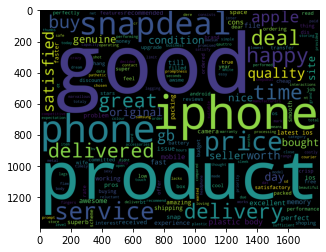

In [12]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [13]:
# positive words # Choose the path for +ve words stored in system
with open("E:/Ravi_ExcelR_Assignments/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]

In [14]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [15]:
# negative words  Choose path for -ve words stored in system
with open("E:/Ravi_ExcelR_Assignments/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

In [16]:
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [17]:
# negative word cloud

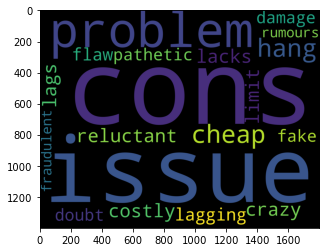

In [18]:
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

In [19]:
# Positive word cloud

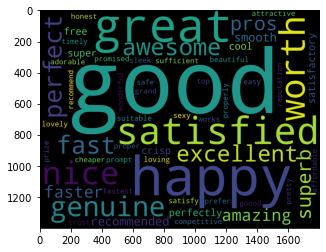

In [20]:
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)